<h1 align="center">2. Exploratory Data Analysis</h1>
<h3 align="center">Dataset: <a href="https://www.kaggle.com/c/competitive-data-science-predict-future-sales">Predict future sales</a></h3>

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib_venn import venn2, venn3

plt.rcParams.update({"figure.facecolor":  (1.0, 1.0, 1.0, 1.0)}) # Matplolib white background, no traspartent

### Constants

In [2]:
ENGLISH = False

DATA_RUS_PATH = "../DATA/1. Original data Russian (96Mb)/"
DATA_ENG_PATH = "../DATA/2. Translated data English (1Mb)/"
DATA_SUB_PATH = "../DATA/5. Submissions/"

### Load data

In [3]:
sales = pd.read_csv(DATA_RUS_PATH + "sales_train.csv")          # Dayly sales  Jan 2013 -> Oct 2015
test  = pd.read_csv(DATA_RUS_PATH + "test.csv", index_col="ID") # Predict Noviember 2015
sub   = pd.read_csv(DATA_RUS_PATH + "sample_submission.csv", index_col="ID")

if ENGLISH: 
    shops = pd.read_csv(DATA_ENG_PATH + "shops.csv")           # shops    (60)
    items = pd.read_csv(DATA_ENG_PATH + "items.csv")           # products  (22170)
    cats  = pd.read_csv(DATA_ENG_PATH + "item_categories.csv") # product categories (84)

else:
    shops = pd.read_csv(DATA_RUS_PATH + "shops.csv")           # shops    (60)
    items = pd.read_csv(DATA_RUS_PATH + "items.csv")           # products  (22170)
    cats  = pd.read_csv(DATA_RUS_PATH + "item_categories.csv") # product categories (84)

### Clean

In [4]:
sales['date'] = pd.to_datetime(sales['date'], format='%d.%m.%Y') # Convert date to datetime type

sales.loc[sales.shop_id == 0,  'shop_id'] = 57  # Якутск Орджоникидзе, 56
sales.loc[sales.shop_id == 1,  'shop_id'] = 58  # Якутск ТЦ "Центральный"
sales.loc[sales.shop_id == 11, 'shop_id'] = 10  # Жуковский ул. Чкалова 39м²
sales.loc[sales.shop_id == 40, 'shop_id'] = 39


oct2015 = sales[sales.date_block_num==33]

### Item categories

In [6]:
pd.DataFrame(cats.item_category_name.values.reshape(-1, 4))

,0,1,2,3
0,PC - Гарнитуры/Наушники,Аксессуары - PS2,Аксессуары - PS3,Аксессуары - PS4
1,Аксессуары - PSP,Аксессуары - PSVita,Аксессуары - XBOX 360,Аксессуары - XBOX ONE
2,Билеты (Цифра),Доставка товара,Игровые консоли - PS2,Игровые консоли - PS3
3,Игровые консоли - PS4,Игровые консоли - PSP,Игровые консоли - PSVita,Игровые консоли - XBOX 360
4,Игровые консоли - XBOX ONE,Игровые консоли - Прочие,Игры - PS2,Игры - PS3
5,Игры - PS4,Игры - PSP,Игры - PSVita,Игры - XBOX 360
6,Игры - XBOX ONE,Игры - Аксессуары для игр,Игры Android - Цифра,Игры MAC - Цифра
7,Игры PC - Дополнительные издания,Игры PC - Коллекционные издания,Игры PC - Стандартные издания,Игры PC - Цифра
8,"Карты оплаты (Кино, Музыка, Игры)",Карты оплаты - Live!,Карты оплаты - Live! (Цифра),Карты оплаты - PSN
9,Карты оплаты - Windows (Цифра),Кино - Blu-Ray,Кино - Blu-Ray 3D,Кино - Blu-Ray 4K


# <center> Time

### People Sales per month

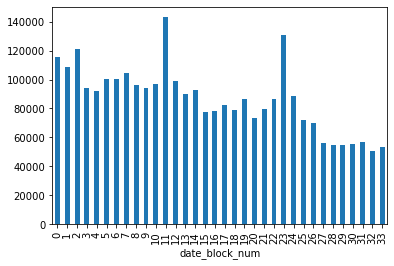

In [7]:
sales.groupby(["date_block_num"]).size().plot.bar();

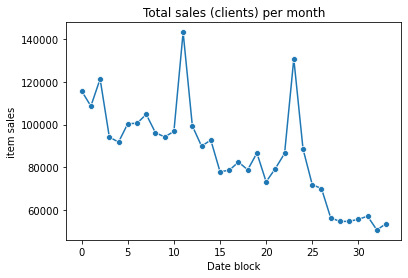

In [8]:
sales_by_month = sales.groupby('date_block_num').size()

ax = sb.lineplot(data=sales_by_month, marker='.', markersize=12)
_ = ax.set(xlabel = "Date block", ylabel = "item sales", title = "Total sales (clients) per month")

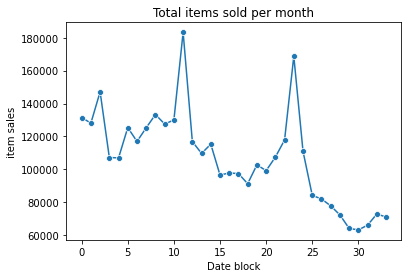

In [9]:
sales_by_month = sales.groupby('date_block_num').item_cnt_day.sum()

ax = sb.lineplot(data=sales_by_month, marker='.', markersize=12)
_ = ax.set(xlabel = "Date block", ylabel = "item sales", title = "Total items sold per month")

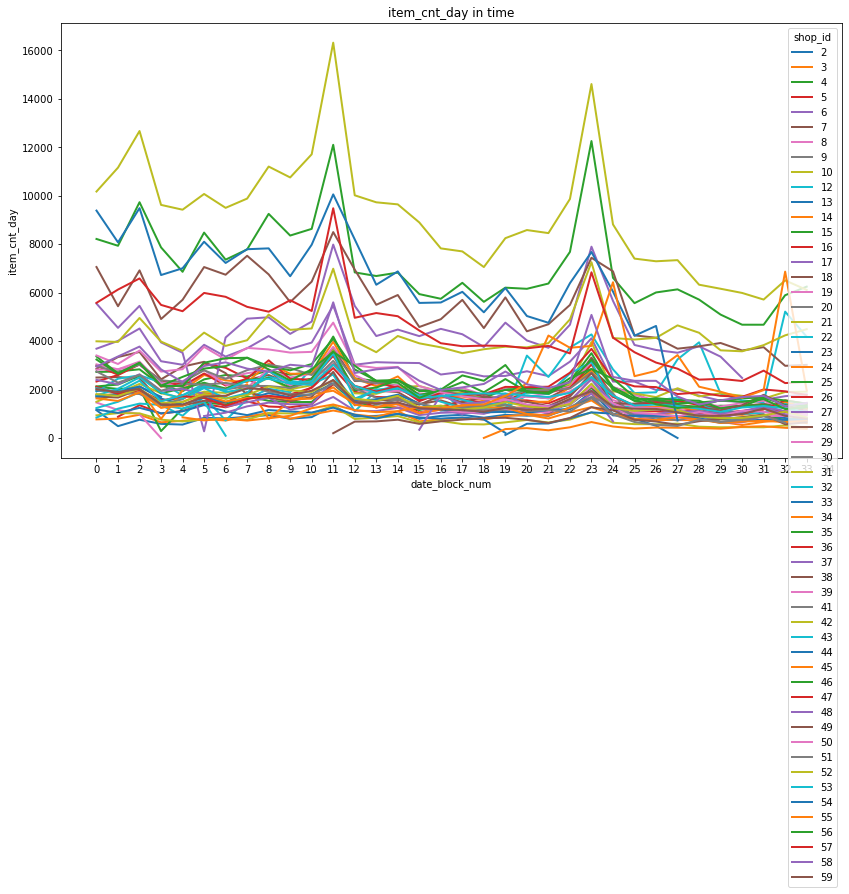

In [10]:
#### PLot the trend chart for the item count - Jan2013 to October 2015
fig = sales.groupby(['date_block_num' , 'shop_id'])['item_cnt_day'].sum().unstack().plot(
    figsize=(14, 8), linewidth=2)

fig.set_title('item_cnt_day in time')
fig.set_ylabel('item_cnt_day')
plt.xticks(np.arange(0, 35, 1))
plt.show() 

# <center> Outliers

### Outlier: Sales with a lot of quatities

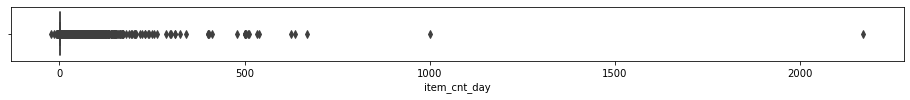

In [11]:
plt.figure(figsize=(16,1))
sb.boxplot(x=sales.item_cnt_day);

### Outlier: Sales with a expensive items

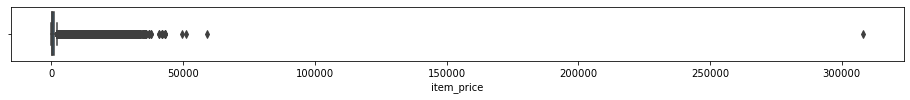

In [12]:
plt.figure(figsize=(16,1))
sb.boxplot(x=sales.item_price);

### Negative prices -> Refunds

In [13]:
sales.loc[sales.item_price<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,2013-05-15,4,32,2973,-1.0,1.0


# <center> Train-Test distribution

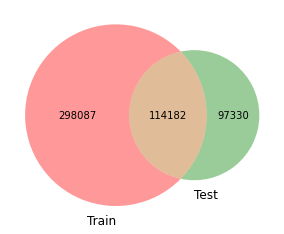

In [14]:
# Second way
venn2([set((sales.shop_id.astype(str) + sales.item_id.astype(str)).unique()),
       set((test.shop_id.astype(str)  + test.item_id.astype(str)).unique())],
      set_labels = ('Train', 'Test'))
plt.show()


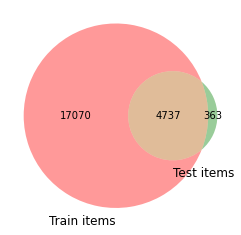

In [15]:
venn2([set(sales.item_id.unique()), set(test.item_id.unique())],
      set_labels = ('Train items', 'Test items'))
plt.show()

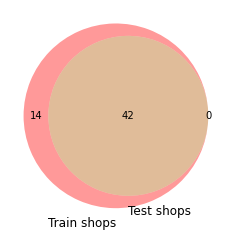

In [16]:
venn2([set(sales.shop_id.unique()), set(test.shop_id.unique())],
      set_labels = ('Train shops', 'Test shops'))
plt.show()

# October 2015 VS Nobember 2015

In [17]:
sep2015 = sales[sales.date_block_num==32]
oct2015 = sales[sales.date_block_num==33]

oct15_item_shop = oct2015.groupby(["shop_id", "item_id"])["item_cnt_day"].sum().reset_index()

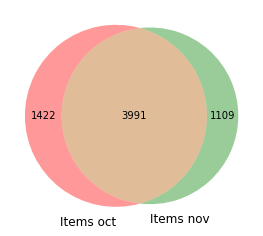

In [18]:
venn2([set(oct2015.item_id.unique()),
       set(test.item_id.unique())],
      set_labels = ('Items oct', 'Items nov'))
plt.show()

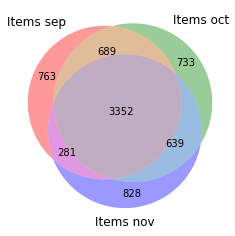

In [19]:
venn3([set(sep2015.item_id.unique()),
       set(oct2015.item_id.unique()),
       set(test.item_id.unique())],
      set_labels = ('Items sep', 'Items oct', 'Items nov'))
plt.show()